In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math
import random
from numpy.lib.scimath import sqrt
from scipy.signal import find_peaks

15
72
[ 1  4  8  9 15]


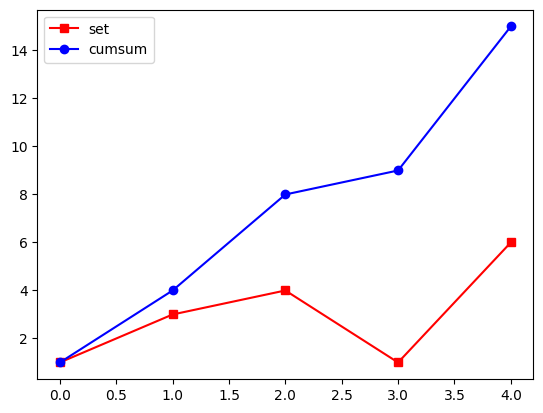

In [8]:
lst = [1,3,4,1,6]

print(np.sum(lst))
print(np.prod(lst))
print(np.cumsum(lst))

plt.plot(lst,'rs-')
plt.plot(np.cumsum(lst),'bo-')

plt.legend(['set','cumsum'])

plt.show()

In [11]:
# My Exercise Solution:
a = list(range(1,6))

suma = np.sum(a)
squared_sum = np.sum([x**2 for x in a])

lhs = suma / squared_sum
rhs = 1 / suma

print(lhs == rhs)

proda = np.prod(a)
squared_prod = np.prod([x**2 for x in a])

lhs = proda / squared_prod
rhs = 1 / proda

print(lhs == rhs)

False
True


In [14]:
# Alternative Solution:
a = np.arange(1,6)

suma = np.sum(a)
suma2 = np.sum(a**2)

ans1 = suma / suma2
ans2 = 1 / suma

print('For sum:')
print('Option 1 = %s \nOption 2 = %s' %(ans1,ans2))

proda = np.prod(a)
proda2 = np.prod(a**2)

ans1 = proda / proda2
ans2 = 1 / proda

print('For product:')
print('Option 1 = %s \nOption 2 = %s' %(ans1,ans2))

For sum:
Option 1 = 0.2727272727272727 
Option 2 = 0.06666666666666667
For product:
Option 1 = 0.008333333333333333 
Option 2 = 0.008333333333333333


In [17]:
x = [1,2,4,-4]
np.diff(x)

array([ 1,  2, -8])

In [21]:
v = np.arange(0,11)
print(v)
print(np.diff(v))
print(np.diff(v,2))
print(np.diff(np.diff(v)))

[ 0  1  2  3  4  5  6  7  8  9 10]
[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]


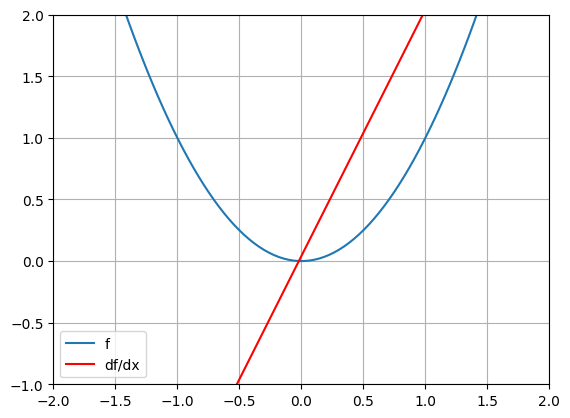

In [36]:
# Introductions into derivatives.
x = np.linspace(-2,2,100)
fx = x**2

plt.plot(x,fx,label='f')

df = np.diff(fx)
dx = np.diff(x)

plt.plot(x[:-1],df/dx,color='r',label='df/dx')

plt.xlim([x[0],x[-1]])
plt.ylim([-1,2])

plt.grid()
plt.legend()
plt.show()

In [40]:
## the polynomial
# 3x^2 + 2x - 1 = 0

coefs = [3,2,-1]
roots = np.roots(coefs)
print(roots)

x = sym.symbols('x')
pn = 3*x**2 + 2*x - 1

for i in roots:
  display(Math('\\text{At }x=%g, \\quad %s = %g' %(i,sym.latex(pn),pn.subs(x,i))))

[-1.          0.33333333]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# Generate a degree-N polynomial and count the number of roots
# A degree-0 polynomial has x roots
# A degree-1 polynomial has x roots...
# A degree-N polynomial has x roots

# func = 9*x**9 + 8*x**8 + ... + 1*x**0

def get_random_coeff(a,b):
  coeff = 0
  while coeff == 0:
    coeff = random.randint(a,b)
  return coeff

n = 10
coefs = []
for i in range(0,n):
  coefs.append(get_random_coeff(-9,9))

print(coefs)

roots = np.roots(coefs)
print(roots)

x = sym.symbols('x')

terms = []

power = n - 1
for i in range(0,n):
  subset = coefs[i]*x**power
  terms.append(subset)
  power -= 1

polynomial = 0

for term in terms:
  polynomial += term

print(polynomial)


[2, -4, 3, -1, 2, -8, -5, 2, 6, -7]
[ 1.68749577+0.j          0.91040295+1.25658168j  0.91040295-1.25658168j
 -0.52002512+1.07842612j -0.52002512-1.07842612j -0.86733535+0.46063205j
 -0.86733535-0.46063205j  0.63320964+0.47129968j  0.63320964-0.47129968j]
2*x**9 - 4*x**8 + 3*x**7 - x**6 + 2*x**5 - 8*x**4 - 5*x**3 + 2*x**2 + 6*x - 7


In [22]:
for i in range(1,11):
  coefs = np.arange(1,i+1)
  display(Math('\\text{A degree-}%s \\text{ polynomial has }%s \\text{ roots.}' %(len(coefs)-1,len(np.roots(coefs)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
a = 2
b = 7
c = 5

quadeqP = ( -b + np.sqrt(b**2 - 4*a*c)) / (2*a)
quadeqN = ( -b - np.sqrt(b**2 - 4*a*c)) / (2*a)

print(quadeqP, quadeqN)

-1.0 -2.5


In [36]:
def quadeq(a,b,c):
  out = np.zeros(2,dtype=complex)
  
  parta = sqrt(b**2 - 4*a*c)
  partb = (2*a)

  out[0] = ( -b + parta) / partb
  out[1] = ( -b - parta) / partb

  return out

print(quadeq(2,7,5))

[-1. +0.j -2.5+0.j]


C:\Users\RyanHarris\AppData\Local\Temp\ipykernel_67980\2138848434.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i,j] = ( -b[i] + sqrt(b[i]**2 - 4*a*c[j])) / (2*a)


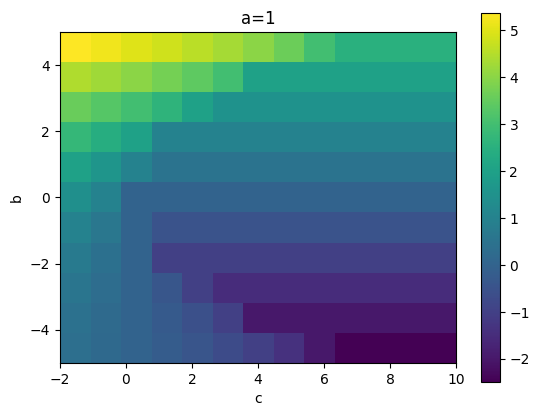

In [4]:

a = 1
b = np.arange(-5,6)
c = np.arange(-2,11)

M = np.zeros((b.shape[0],c.shape[0]))

for i in range(0, b.shape[0]):
  for j in range(0, c.shape[0]):
    M[i,j] = ( -b[i] + sqrt(b[i]**2 - 4*a*c[j])) / (2*a)

plt.imshow(M,extent=[ c[0],c[-1], b[0],b[-1] ])
plt.xlabel('c')
plt.ylabel('b')
plt.title('a=' + str(a))
plt.colorbar()
plt.show()

# Complex Numbers

In [5]:
print(1j)
print(sqrt(-1))
print(np.sqrt(-1,dtype=complex))
print(sym.I)

1j
1j
1j
I


In [3]:
real_part = 4
imag_part = -5

cn1 = np.complex128(real_part,imag_part)
cn2 = real_part + 1j*imag_part

print(cn1, cn2)
print(type(cn1),type(cn2))

(4-5j) (4-5j)
<class 'numpy.complex128'> <class 'complex'>


In [6]:
z1 = np.complex128(4,5)
z2 = np.complex128(3,2)

print(z1 - z2)

print(np.real(z1),np.imag(z1))

(1+3j)
4.0 5.0


In [9]:
w = 2 + 4j
z = 5 + 6j

print(w + z)
print(np.complex128(np.real(w) + np.real(z), np.imag(w) + np.imag(z)))

(7+10j)
(7+10j)


In [21]:
z1 = np.complex128(4,5)
z2 = np.complex128(6,-2)

w = np.real(z1)*np.real(z2) + np.real(z1)*np.imag(z2)*1j + np.imag(z1)*1j*np.real(z2) + np.imag(z1)*1j*np.imag(z2)*1j
print(w)

print(z1*z2)

print(sym.sympify(w))

print(np.conj(z1))
print(np.conj(z2))


(34+22j)
(34+22j)
34.0 + 22.0*I
(4-5j)
(6+2j)


In [28]:
a,b = sym.symbols('a b',real=True)
z = a + b*sym.I

full = z*sym.conjugate(z)
print(full)

display(Math('z\\times z^* = %s' %sym.latex(sym.expand(z*sym.conjugate(z)))))

(a - I*b)*(a + I*b)


<IPython.core.display.Math object>

In [29]:
z = complex(4,2)
display(Math('\\frac{%s}{2} = %s' %(z,z/2)))

<IPython.core.display.Math object>

In [3]:
z1 = complex(4,2)
z2 = complex(2,-3)

display(Math('\\frac{%s}{%s} = \\frac{%s\\times%s}{%s\\times%s} = %s' %(z1, z2, z1, np.conj(z2), z2, np.conj(z2), z1/z2)))

<IPython.core.display.Math object>

In [2]:
z = complex(4,2)
w = complex(3,5)

ans = (((z - 1)*(z*w + w)) / (w*z - w)) * (((w - 1) * (1 - w)) / (-z*w**2 - w**2 + 2*w*z + 2*w - z - 1))
print(ans)

(1+0j)


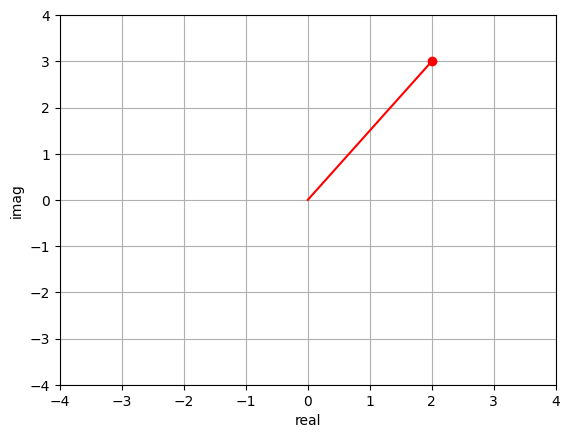

In [11]:
z = complex(2,3)

plt.plot(np.real(z),np.imag(z),'ro')
plt.plot([0,np.real(z)], [0,np.imag(z)], 'r')

plt.xlabel('real')
plt.ylabel('imag')
plt.axis([-4,4,-4,4])
plt.grid()

plt.show()

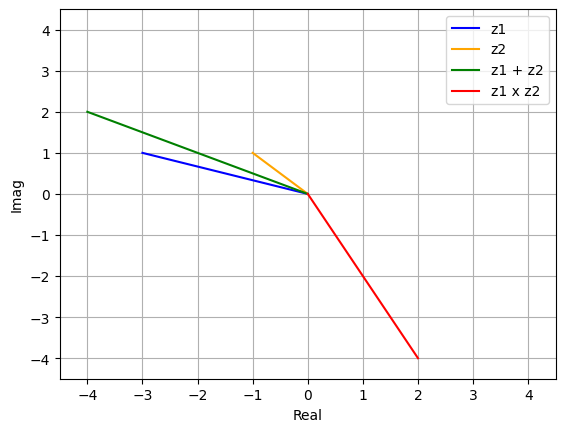

In [20]:
z1 = complex(-3,1)
z2 = complex(-1,1)

zsum = z1+z2
zprod = z1*z2

plt.plot([0,np.real(z1)],[0,np.imag(z1)],'b',label='z1')
plt.plot([0,np.real(z2)],[0,np.imag(z2)],'orange',label='z2')
plt.plot([0,np.real(zsum)],[0,np.imag(zsum)],'g',label='z1 + z2')
plt.plot([0,np.real(zprod)],[0,np.imag(zprod)],'r',label='z1 x z2')

plt.axis([-4.5,4.5,-4.5,4.5])
plt.grid()
plt.legend()
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

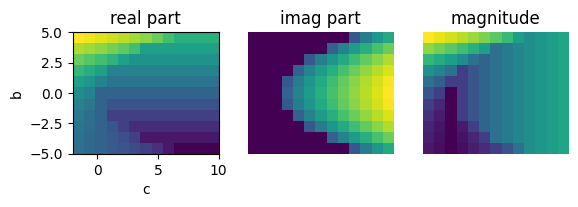

In [28]:
a = 1
b = np.arange(-5,6)
c = np.arange(-2,11)

M = np.zeros((b.shape[0],c.shape[0]),dtype=complex)

for i in range(0, b.shape[0]):
  for j in range(0, c.shape[0]):
    M[i,j] = ( -b[i] + sqrt(b[i]**2 - 4*a*c[j])) / (2*a)

plt.subplot(1,3,1)
plt.imshow(np.real(M),extent=[ c[0],c[-1], b[0],b[-1] ])
plt.title('real part')
plt.xlabel('c')
plt.ylabel('b')
plt.axis('on')

plt.subplot(1,3,2)
plt.imshow(np.imag(M),extent=[ c[0],c[-1], b[0],b[-1] ])
plt.title('imag part')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.absolute(M),extent=[ c[0],c[-1], b[0],b[-1] ])
plt.title('magnitude')
plt.axis('off')

plt.show()

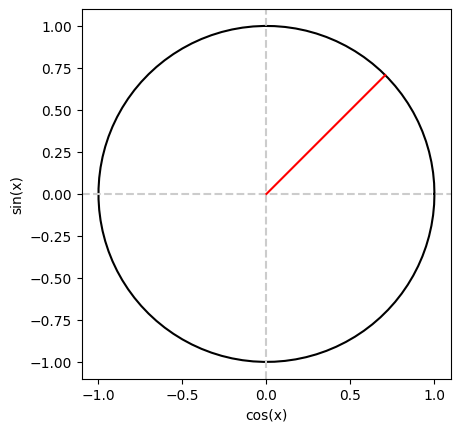

In [19]:
x = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(x),np.sin(x),'k')

plt.plot([-1.1,1.1],[0,0],'--',color=[.8,.8,.8])
plt.plot([0,0],[-1.1,1.1],'--',color=[.8,.8,.8])

angle = np.pi/4
plt.plot([0,np.cos(angle)],[0,np.sin(angle)],'r')

plt.axis('square')
plt.axis([-1.1,1.1,-1.1,1.1])
plt.xlabel('cos(x)')
plt.ylabel('sin(x)')

plt.show()

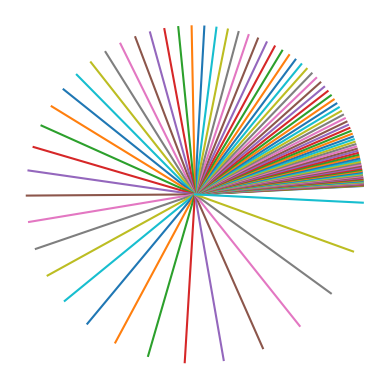

In [34]:
x = np.linspace(-3,1.83,100)

k = np.exp(x)

for i in k:
  plt.plot([0,np.cos(i)],[0,np.sin(i)])

plt.axis('square')
plt.axis('off')
plt.show()

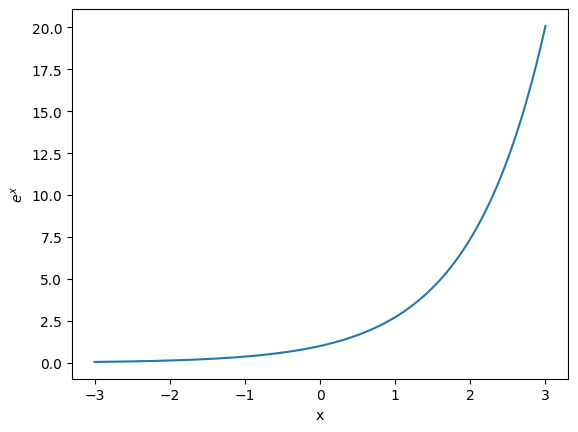

C:\Users\RyanHarris\AppData\Local\Temp\ipykernel_73772\1878155376.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(x))
C:\Users\RyanHarris\AppData\Local\Temp\ipykernel_73772\1878155376.py:8: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(x))


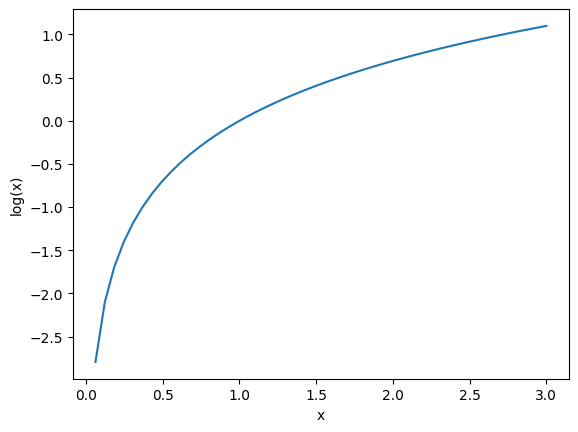

In [39]:
x = np.linspace(-3,3,99)

plt.plot(x,np.exp(x))
plt.xlabel('x')
plt.ylabel('$e^x$')
plt.show()

plt.plot(x,np.log(x))
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

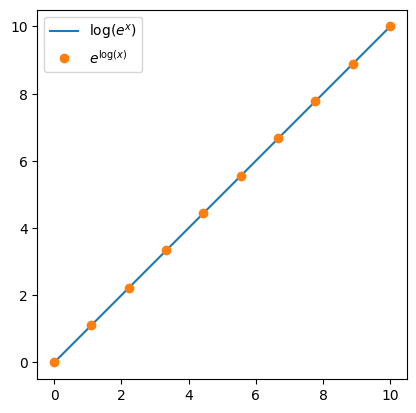

In [54]:
x = np.linspace(.0001,10,10)

y1 = np.log(np.exp(x))
y2 = np.exp(np.log(x))

plt.plot(x,y1,label='$\\log(e^x)$')
plt.plot(x,y2,'o',label='$e^{\\log(x)}$')

plt.axis('square')
plt.legend()
plt.show()

# Gaussian (Bell Curve)

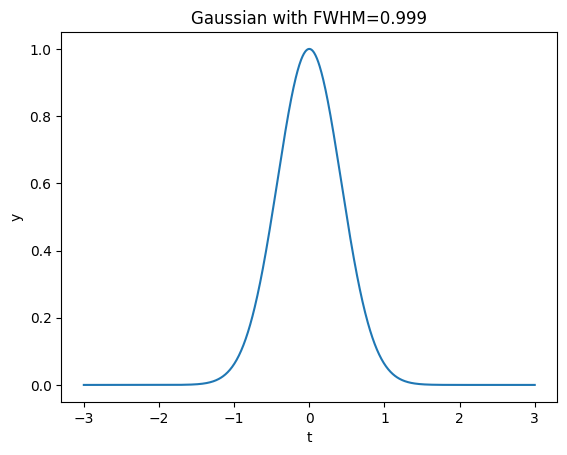

In [5]:
h = .999
t = np.linspace(-3,3,1001)

g = np.exp(-4*np.log(2)*t**2 / h**2)

plt.plot(t,g)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gaussian with FWHM=' + str(h))

plt.show()

In [7]:
yVal = .5
tvals = h*sqrt(np.log(yVal)/(-4*np.log(2)))
print(tvals,-tvals)

0.4995 -0.4995


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.20087957e-12 5.76988762e-12 6.39981824e-12 ... 6.39981824e-12
  5.76988762e-12 5.20087957e-12]
 [8.76765674e-12 9.70661437e-12 1.07439396e-11 ... 1.07439396e-11
  9.70661437e-12 8.76765674e-12]
 [1.45519152e-11 1.60777447e-11 1.77600180e-11 ... 1.77600180e-11
  1.60777447e-11 1.45519152e-11]]


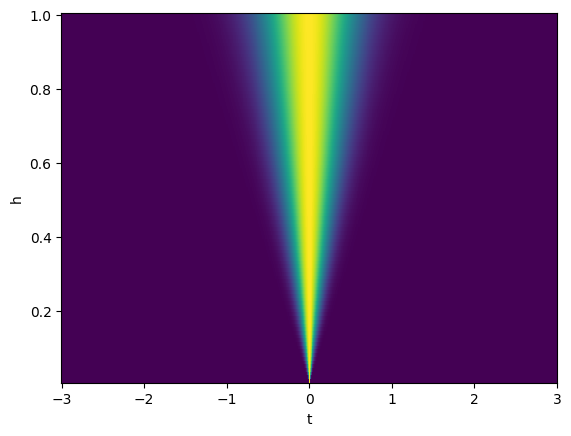

In [16]:
N = 100
t = np.linspace(-3,3,1001)
h = np.zeros(N)

G = np.zeros((N,len(t)))

for i in range(N):
  h[i] = (i+1)/N
  G[i,:] = np.exp(-4*np.log(2)*t**2 / h[i]**2)

print(G)

plt.pcolormesh(t,h,G)

plt.xlabel('t')
plt.ylabel('h')
plt.show()

# Roots of Unity

In [25]:
n = 4
for k in range(0,n):
  z = sym.exp( 2*sym.pi*sym.I*k/n )
  display(Math('(%s)^{%s} \\Rightarrow %s' %(sym.latex(z),n,sym.latex(z**n))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

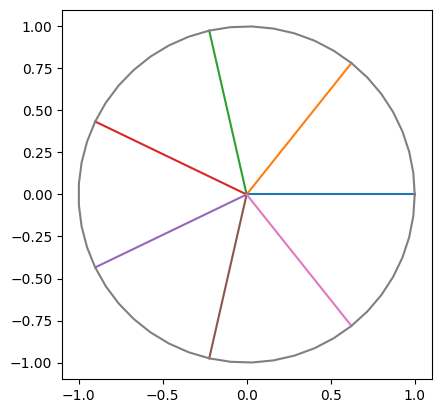

In [30]:
n = 7

for k in range(0,n):
  z = np.exp( 2*np.pi*1j*k/n )
  plt.plot([0,np.real(z)],[0,np.imag(z)])

x = np.linspace(0,2*np.pi)
plt.plot(np.cos(x),np.sin(x),color='gray')

plt.axis('square')
plt.show()

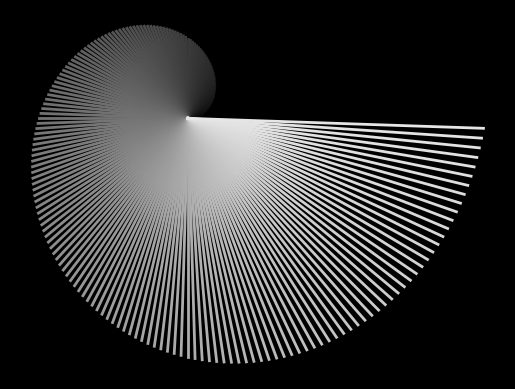

In [50]:
n = 200

plt.figure(facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

color = np.linspace(0,.9,n)

for k in range(0,n):
  z = k*np.exp( 2*np.pi*1j*k/n )
  plt.plot([0,np.real(z)],[0,np.imag(z)],color=[color[k],color[k],color[k]],linewidth=2)

plt.axis('off')
plt.show()

# Logarithms

In [52]:
ls = np.linspace(1,2,10)
print(ls)

a = np.log10(1)
b = np.log10(2)
logs = np.logspace(a,b,10)
print(logs)

[1.         1.11111111 1.22222222 1.33333333 1.44444444 1.55555556
 1.66666667 1.77777778 1.88888889 2.        ]
[1.         1.08005974 1.16652904 1.25992105 1.36079    1.46973449
 1.58740105 1.71448797 1.85174942 2.        ]


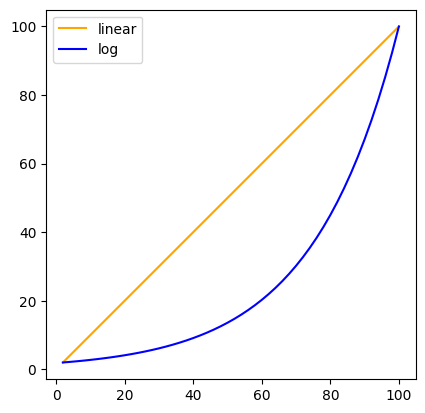

In [72]:
a = 2
b = 100
n = 50
linear = np.linspace(a,b,n)
plt.plot(linear,linear,'orange',label='linear')

start = np.log10(a)
end = np.log10(b)
log = np.logspace(start,end,n)
plt.plot(linear, log,'b',label='log')

plt.axis('square')
plt.legend()
plt.show()

In [7]:
a = 3
b = 4

res1 = np.log(a*b)
res2 = np.log(a) * np.log(b)
res3 = np.log(a) + np.log(b)

print(res1, res2, res3)
display(Math('\\log(%g\\times%g) = %g' %(a,b,res1)))
display(Math('\\log(%g) \\times \\log(%g) = %g' %(a,b,res2)))
display(Math('\\log(%g) + \\log(%g) = %g' %(a,b,res3)))

display(Math('\\log(%g\\times%g) = \\log(%g) + \\log(%g)' %(a,b,a,b)))
display(Math('\\log(%g\\times%g) \\neq \\log(%g) \\times \\log(%g)' %(a,b,a,b)))


2.4849066497880004 1.523000020837618 2.4849066497880004


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
a = 3
b = 4

res1 = np.log(a/b)
res2 = np.log(a) / np.log(b)
res3 = np.log(a) - np.log(b)

print(res1, res2, res3)
display(Math('\\log(\\frac{%g}{%g}) = %g' %(a,b,res1)))
display(Math('\\log(%g) / \\log(%g) = %g' %(a,b,res2)))
display(Math('\\log(%g) - \\log(%g) = %g' %(a,b,res3)))

display(Math('\\log \\left (\\frac{%g}{%g} \\right) = \\log(%g) - \\log(%g)' %(a,b,a,b)))
display(Math('\\log \\left (\\frac{%g}{%g} \\right) \\neq \\frac{\\log(%g)}{\\log(%g)}' %(a,b,a,b)))

-0.2876820724517809 0.7924812503605781 -0.2876820724517808


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
a = 3
b = 4

display(Math('\\log(a^b) = b\\times\\log(a)'))

for i in range(0,3):
  result1 = np.log(a**b)
  result2 = b * np.log(a)

  display(Math('\\log(%g^%g) = %g' %(a,b,result1)))
  display(Math('%g\\times\\log(%g) = %g' %(b,a,result2)))

  a+=1
  b+=1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Arithmetic & Geometric Sequences

In [44]:
a = 2
d = 3
n = 6

aseq = a + d*np.arange(0,n)
print(aseq)

[ 2  5  8 11 14 17]


In [45]:
a = 2
r = 3

gseq = a*r**np.arange(0,n)
print(gseq)

[  2   6  18  54 162 486]


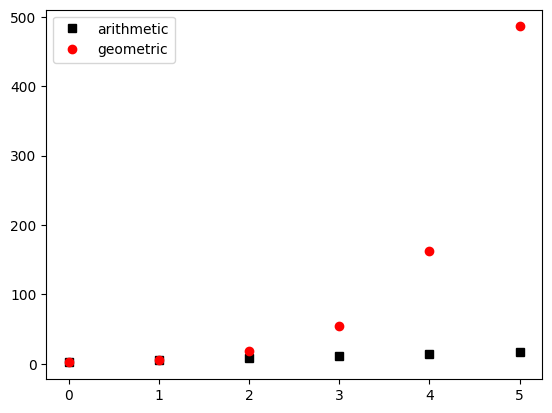

In [42]:
plt.plot(aseq,'ks',label='arithmetic')
plt.plot(gseq,'ro',label='geometric')

plt.legend()
plt.show()

In [58]:
a = 2
d = 3
n = 6

aseq = a + d*np.arange(0,n)
gseq = a*d**np.arange(0,n)

index = 4
ares = a + d*(index-1)
print(ares,aseq[index-1])

gres = a*d**(index-1)
print(gres,gseq[index-1])

11 11
54 54


# Orders of Magnitude and Scientific Notation

In [64]:
x = 312123253243
print('{:,e}'.format(x))
print('{:,d}'.format(x))
print('%.4e' %x)

3.121233e+11
312,123,253,243
3.1212e+11


In [123]:
def get_orders_of_magnitude(num):
  if num == 0:
    print('can\'t be zero')
    return

  order_of_magnitude = int(np.floor(np.log10(abs(num))))
  num_str = '{:,e}'.format(num)
  scientific_not = num_str[0:num_str.find('.')]

  display(Math('%g \\text{ is } %g \\text{ orders of magnitude, } \\approx %s \\times 10^{%s}' %(num,order_of_magnitude,scientific_not,order_of_magnitude)))

get_orders_of_magnitude(-0.000007342)
get_orders_of_magnitude(5342122131)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Maxima & Minima of Functions

In [2]:
lst = [-4,5.5,1,2]
maxval = np.max(lst)
maxvalidx = np.argmax(lst)

lst[maxvalidx]

5.5

-0.7388185920927908 9


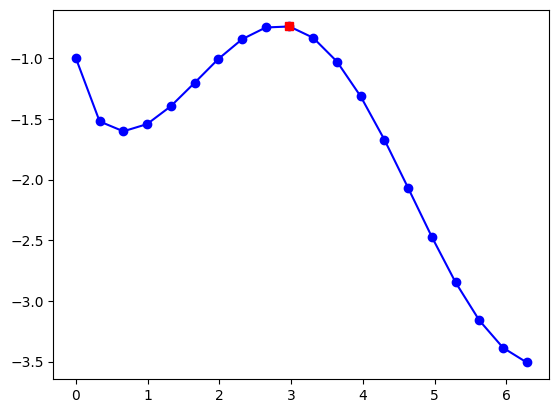

In [6]:
x = np.linspace(0,2*np.pi,20)
fx = -(np.cos(x) + np.sqrt(x))

fmax = np.max(fx)
fmaxids = np.argmax(fx)
print(fmax,fmaxids)

plt.plot(x,fx,'bo-')
plt.plot(x[fmaxids],fmax,'rs')

plt.show()

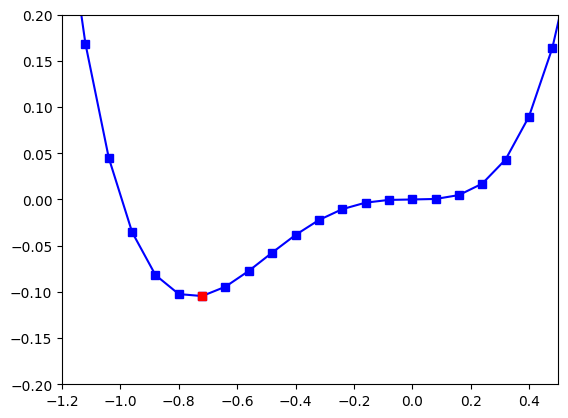

In [7]:
x = np.linspace(-2,2,51)
fx = x**3 + x**4

plt.plot(x,fx,'bs-')

fminidx = np.argmin(fx)

plt.plot(x[fminidx],fx[fminidx],'rs')

plt.xlim([-1.2,.5])
plt.ylim([-.2,.2])

plt.show()

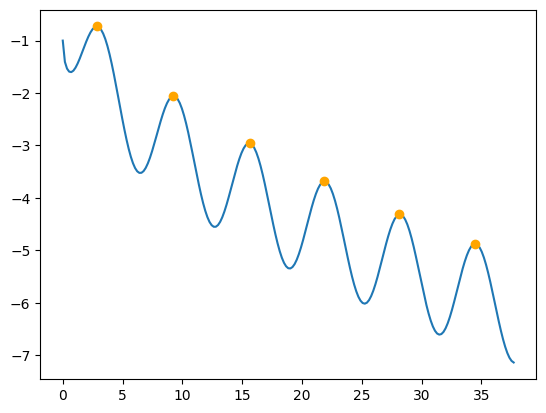

In [26]:
x = np.linspace(0,12*np.pi, 213)
fx = -np.cos(x) - sqrt(x)

plt.plot(x,fx)

idxdict = find_peaks(fx)

# for id in idxdict[0]:
#   plt.plot(x[id],fx[id],'o',color='orange')

plt.plot(x[idxdict[0]],fx[idxdict[0]],'o',color='orange')

plt.show()

# Even & Odd Functions

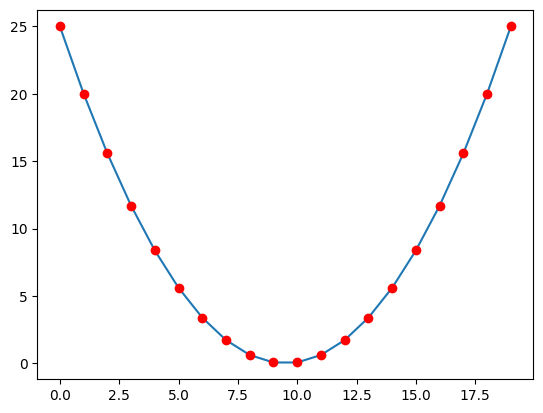

In [ ]:
# Even function
x = np.linspace(-5,5,20)

f_even = x**2
f_even_neg = (-x)**2

plt.plot(f_even)
plt.plot(f_even_neg, 'ro')

plt.show()

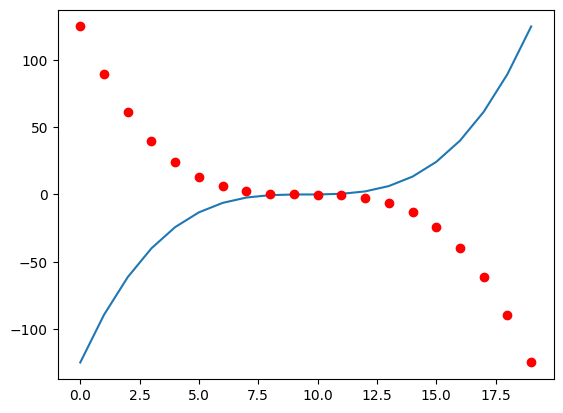

In [33]:
# Negative function
x = np.linspace(-5,5,20)

f_odd = x**3
f_odd_neg = (-x)**3

plt.plot(f_odd)
plt.plot(f_odd_neg, 'ro')

plt.show()

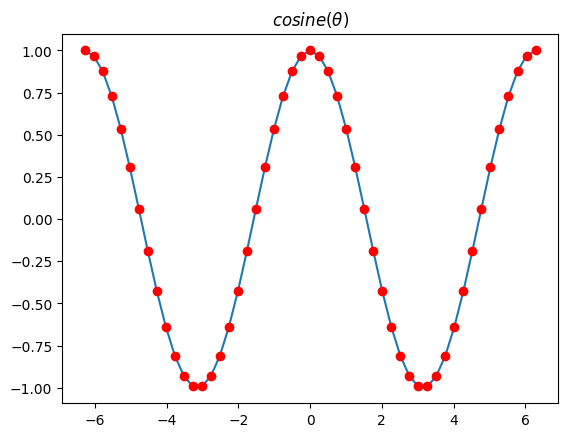

In [48]:
x = np.linspace(-2*np.pi, 2*np.pi, 51)

cos     = np.cos(x)
cos_neg = np.cos(-x)

plt.plot(x,cos)
plt.plot(x,cos_neg, 'ro')

plt.title('$cosine(\\theta)$')
plt.show()

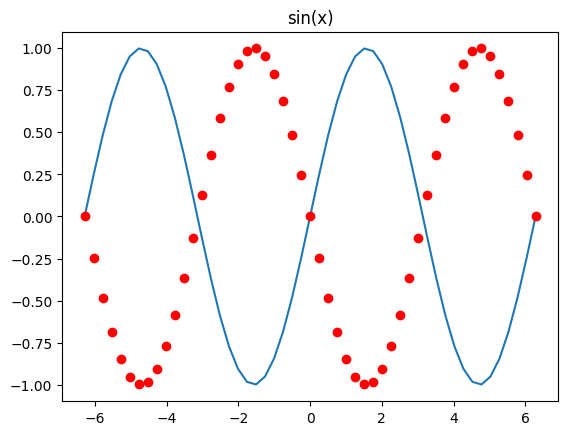

In [46]:
x = np.linspace(-2*np.pi, 2*np.pi, 51)

sin = np.sin(x)
sin_neg = np.sin(-x)

plt.plot(x,sin)
plt.plot(x,sin_neg, 'ro')

plt.title('sin(x)')
plt.show()